### **Artefact Detection**

This notebook plots the predictions of the model, ***fasterrcnn_mobilenet_v3_large_fpn*** that is trained for an object detection task. It is able to detect: QR Codes, Bar codes, Company logos & Photos at the moment.  

Installing requirements


In [2]:
!pip3 install git+https://github.com/mindee/doctr.git

  Cloning https://github.com/mindee/doctr.git[torch] to /tmp/pip-req-build-c5cl9vni
  Running command git clone -q 'https://github.com/mindee/doctr.git[torch]' /tmp/pip-req-build-c5cl9vni
  fatal: unable to access 'https://github.com/mindee/doctr.git[torch]/': The requested URL returned error: 400
ERROR: Command errored out with exit status 128: git clone -q 'https://github.com/mindee/doctr.git[torch]' /tmp/pip-req-build-c5cl9vni Check the logs for full command output.


Imports


In [4]:
import os

os.environ['USE_TORCH'] = '1'

import argparse
import logging

import cv2
import matplotlib.pyplot as plt
import torch

import doctr
from doctr.io.image import read_img_as_tensor
from doctr.models import obj_detection

# Detected classes
CLASSES = ["__background__", "QR Code", "Barcode", "Logo", "Photo"]
# Color map for each class
CM = [(255, 255, 255), (0, 0, 150), (0, 0, 0), (0, 150, 0), (150, 0, 0)]

Helper Functions

In [18]:
# Plots the predictions on the input image
def plot_predictions(image, boxes, labels):
    for box, label in zip(boxes, labels):
        # Bounding box around artefacts
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]),
                      CM[label], 2)
        text_size, _ = cv2.getTextSize(CLASSES[label], cv2.FONT_HERSHEY_SIMPLEX, 2, 2)
        text_w, text_h = text_size
        # Filled rectangle above bounding box
        cv2.rectangle(image, (box[0], box[1]), (box[0] + text_w, box[1] - text_h),
                      CM[label], -1)
        # Text bearing the name of the artefact detected
        cv2.putText(image, CLASSES[label], (int(box[0]), int(box[1])),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
    plt.axis('off')
    plt.imshow(image)
    plt.show()

@torch.no_grad()
def main(img_path):
    model = obj_detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True, num_classes=5).eval()
    img = read_img_as_tensor(img_path).unsqueeze(0)
    if torch.cuda.is_available():
        model = model.cuda()
        img = img.cuda()

    pred = model(img)
    labels = pred[0]['labels'].detach().cpu().numpy()
    labels = labels.round().astype(int)
    boxes = pred[0]['boxes'].detach().cpu().numpy()
    boxes = boxes.round().astype(int)
    img = img.cpu().permute(0, 2, 3, 1).numpy()[0].copy()
    plot_predictions(img, boxes, labels)



`img_path: str` >> path to image file


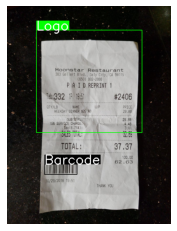

In [19]:
img_path = "/content/drive/MyDrive/colab/1022-receipt.jpg"

main(img_path)